# Data Preparation 

This notebook filters and formats the data for further analysis. 

*Author: Koki Sasagawa*  

*Date: 4/10/2019*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
from api import reverse_geocode

In [2]:
# Show files in raw_data folder
directory = './raw_data/'
files = os.listdir(directory)
for i, fname in enumerate(files):
    print(i, fname)

0 3-min-water-safety-survey_April+6,+2019_11.06.zip
1 3-min-water-safety-survey-paid_April+5,+2019_13.26.zip


In [ ]:
# Specify filename 
# This should correspond to the type of the data
# Leave this entry as blank quotes for the non-mTurk Survey 
# Use '(mTurk)' for the mTurk survey data
fname = ''

In [4]:
# See what parameters this function accepts
# help(pd.read_csv)

## Remove unwanted rows and columns

In [9]:
# Read in data
comparisons = pd.read_csv(directory + files[0], compression='zip')
print("Dimensions: {}".format(comparisons.shape))
comparisons.head(3)

Dimensions: (88, 38)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q7_6,Q7_6_TEXT,Q8,Q9,Q10,Q11,Q11 - Sentiment Polarity,Q11 - Sentiment Score,Q11 - Sentiment,Q11 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How important are the following factors when y...,How important are the following factors when y...,Please state how many cups (8 oz) of water you...,"Of the following, which vehicle do you primari...",How far do you drive your vehicle per day?,"Imagine you were able to have filtered, drinka...",Q11 - Sentiment Polarity,Q11 - Sentiment Score,Q11 - Sentiment,Q11 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID41_6""}","{""ImportId"":""QID41_6_TEXT""}","{""ImportId"":""QID42""}","{""ImportId"":""QID43""}","{""ImportId"":""QID44""}","{""ImportId"":""QID51_TEXT""}","{""ImportId"":""QID51_TEXT_71df8f4eae9840cdb70de1...","{""ImportId"":""QID51_TEXT_71df8f4eae9840cdb70de1...","{""ImportId"":""QID51_TEXT_71df8f4eae9840cdb70de1...","{""ImportId"":""QID51_TEXT_71df8f4eae9840cdb70de1..."
2,2019-03-31 16:46:28,2019-03-31 16:48:05,Survey Preview,NaN,100,96,True,2019-03-31 16:48:05,R_dh8s6jUcZa5UqGZ,NaN,...,NaN,NaN,Between 11 to 15 cups,SUV,Under 20 miles / under 32 km,Wash the sand off my feet at the beach,0,-1,Negative,Unknown


In [10]:
# Drop first 2 rows since they do not contain data points
comparisons = comparisons.drop(index=[0,1], axis=0).reset_index(drop=True)
print("Dimensions: {}".format(comparisons.shape))
comparisons.head(3)

Dimensions: (86, 38)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q7_6,Q7_6_TEXT,Q8,Q9,Q10,Q11,Q11 - Sentiment Polarity,Q11 - Sentiment Score,Q11 - Sentiment,Q11 - Topics
0,2019-03-31 16:46:28,2019-03-31 16:48:05,Survey Preview,NaN,100,96,True,2019-03-31 16:48:05,R_dh8s6jUcZa5UqGZ,NaN,...,NaN,NaN,Between 11 to 15 cups,SUV,Under 20 miles / under 32 km,Wash the sand off my feet at the beach,0,-1,Negative,Unknown
1,2019-03-31 16:51:25,2019-03-31 16:54:48,IP Address,35.0.62.19,100,203,True,2019-03-31 16:54:49,R_OJVXbKHzmhe7m25,NaN,...,NaN,NaN,Less than 1 cup,I do not drive,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-31 16:57:20,2019-03-31 17:01:08,IP Address,35.2.149.130,100,228,True,2019-03-31 17:01:08,R_1IK0hEA0Mide4IB,NaN,...,NaN,NaN,Between 11 to 15 cups,Sedan,Under 20 miles / under 32 km,When I stop every time!!!,0,-7,Negative,Unknown


In [12]:
# Remove any rows with preview data
preview_data = comparisons[comparisons['Status'] == 'Survey Preview'].index.tolist()
if len(preview_data) > 0:
    comparisons = comparisons.drop(axis=0, index=preview_data).reset_index(drop=True)
    print("Dimensions: {}".format(comparisons.shape))
    comparisons.head(3)
else:
    print("No preview data")

Dimensions: (85, 38)


In [13]:
# Remove all empty columns
col_before_drop = set(comparisons.columns)
comparisons = comparisons.dropna(axis=1, how='all')
print("Dimensions: {}".format(comparisons.shape))
col_after_drop = set(comparisons.columns)
print("Dropped columns: {}".format(col_before_drop.difference(col_after_drop)))

Dimensions: (85, 34)
Dropped columns: {'RecipientLastName', 'RecipientEmail', 'ExternalReference', 'RecipientFirstName'}


In [14]:
# Get list of index of unfinished responses and remove
unfinished = comparisons[comparisons['Finished'] == 'False'].index.tolist()
if len(unfinished) > 0:
    comparisons = comparisons.drop(axis=0, index=unfinished).reset_index(drop=True)
    print("Dimensions: {}".format(comparisons.shape))
    comparisons.head(3)
else:
    print("No unfinished responses")

Dimensions: (75, 34)


In [15]:
# Get Address 
comparisons["address"] = comparisons.apply(lambda row: reverse_geocode(row["LocationLatitude"], row["LocationLongitude"]), axis=1)
comparisons["address"].head(3)

0    Thurston, Ann Arbor, MI, United States
1    Thurston, Ann Arbor, MI, United States
2    Thurston, Ann Arbor, MI, United States
Name: address, dtype: object

In [16]:
# Get Country
comparisons["country"] = comparisons.apply(lambda row: reverse_geocode(row["LocationLatitude"], row["LocationLongitude"], location='country'), axis=1)
comparisons["country"].head(3)

0    USA
1    USA
2    USA
Name: country, dtype: object

In [22]:
# Save file 
comparisons.to_csv('./temp_data/comparisons{}.csv'.format(fname))

## Separate responses between US and NON US

In [88]:
# open file
comparisons = pd.read_csv('./temp_data/comparisons{}.csv'.format(fname), index_col=0)

In [89]:
# # Filter US responses by address
# comparisons_US = comparisons[comparisons['address'].str.contains('United States')==True]
# print("Dimensions: {}".format(comparisons_US.shape))
# comparisons_NON_US = comparisons[comparisons['address'].str.contains('United States')==False]
# print("Dimensions: {}".format(comparisons_NON_US.shape))

comparisons_US = comparisons[comparisons['country'] == 'USA']
comparisons_US.reset_index(drop=True, inplace=True)
print("US Dimensions: {}".format(comparisons_US.shape))
comparisons_NON_US = comparisons[comparisons['country'] != 'USA']
comparisons_NON_US.reset_index(drop=True, inplace=True)
print("NON US Dimensions: {}".format(comparisons_NON_US.shape))

US Dimensions: (63, 36)
NON US Dimensions: (12, 36)


In [90]:
# Non US respondents
comparisons_NON_US['address'].value_counts()

Eschborn, Hessen, Deutschland                                1
Nürnberg, Bayern, Deutschland                                1
Barreiro, Portugal                                           1
Awapuni, Palmerston North, Manawatu Wanganui, New Zealand    1
Greater Vancouver, BC, Canada                                1
Indre By, København, Hovedstaden, Danmark                    1
567 30, Jönköpings län, Sverige                              1
Gambir Kel., Gambir, Jakarta Pusat, Indonesia                1
Sopron, Győr-Moson-Sopron, Magyarország                      1
Japan                                                        1
New Barnet, Barnet, England, United Kingdom                  1
Bengaluru, KA, India                                         1
Name: address, dtype: int64

In [91]:
# US respondents 
comparisons_US['address'].value_counts()

Thurston, Ann Arbor, MI, United States                20
Ann Arbor, MI, United States                           5
Bach, Ann Arbor, MI, United States                     3
Foster City, CA, United States                         1
Jackson, MO, United States                             1
Farmington, MI, United States                          1
Broadmoor/Sherwood, Baton Rouge, LA, United States     1
Madison, WI, United States                             1
Westside, Columbus, OH, United States                  1
ABC, Artesia, CA, United States                        1
Houghton, MI, United States                            1
Denton, TX, United States                              1
Monitor Twp, MI, United States                         1
South Side, Waltham, MA, United States                 1
West Bloomfield, MI, United States                     1
Lakewood, Ann Arbor, MI, United States                 1
River North, Chicago, IL, United States                1
Thibodaux, LA, United States   

### Extract the state for each response address

In [92]:
def get_state(address):
    """Extract state from address"""
    address = address.split(',')
    if len(address) > 0: 
        state_code = address[-2].strip()
        return state_code
    else:
        return None    

In [93]:
comparisons_US['state'] = comparisons_US.apply(lambda row: get_state(row['address']), axis=1)
comparisons_US['state'].head(3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    MI
1    MI
2    MI
Name: state, dtype: object

### Filter responses by exclusion criteria.

Q8 - Please state how many cups (8 oz) of water you drink per day on average  
* Decision: Remove respondents that answered 'less than 1 cup'
* Rationale: Since the focus of this survey is on drinking water habits, we want to focus on the responses of people who have some level of frequent water drinking habits

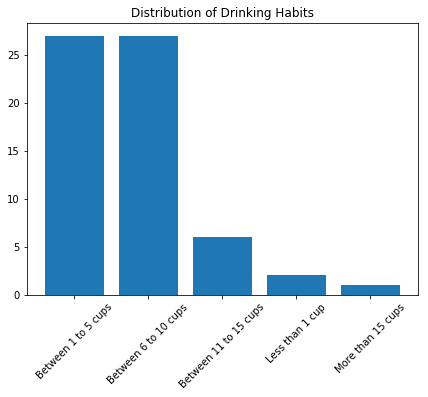

In [94]:
data = comparisons_US['Q8'].value_counts()
x = data.index
y = data.values
plt.figure(1, figsize=(7,5))
plt.bar(x, y)
plt.title("Distribution of Drinking Habits{}".format(fname))
plt.xticks(rotation=45)
fig1 = plt.gcf() # get current figure
fig1.savefig("./images/Drinking_habits{}.png".format(fname))
# plt.show() should come after savefig()
plt.show()

In [95]:
# Get the row index of respondents who answered 'Less than 1 cup'
rows = comparisons_US[comparisons_US['Q8'] == 'Less than 1 cup'].index.tolist()
print('Rows to remove: {}'.format(rows))
# Remove these respondents 
if len(rows) > 0: 
    comparisons_US = comparisons_US.drop(index=rows, axis=0).reset_index(drop=True)
else:
    print("No rows removed")

Rows to remove: [0, 13]


## Visualize the distribution of responses by state

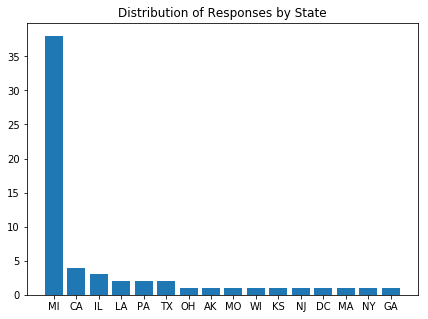

In [96]:
data = comparisons_US['state'].value_counts()
x = data.index
y = data.values
plt.figure(1, figsize=(7,5))
plt.bar(x, y)
plt.title("Distribution of Responses by State{}".format(fname))
fig1 = plt.gcf() # get current figure
fig1.savefig("./images/responses_by_state{}.png".format(fname))
# plt.show() should come after savefig()
plt.show()

In [98]:
# Save data
comparisons_US.to_csv('./temp_data/comparisons_US{}.csv'.format(fname))
comparisons_NON_US.to_csv('./temp_data/comparisons_NON_US{}.csv'.format(fname))

## Prepare the data for BradleyTerry Model Input

In [99]:
# Separate data for paired comparisons analysis 
paired_questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
paired_comparisons = comparisons_US[paired_questions]
columns = ['source1', 'source2', 'win1', 'win2']
rows = []

for i in paired_questions:
    row = paired_comparisons[i].value_counts().index.tolist() 
    row = row + paired_comparisons[i].value_counts().values.tolist()
    print(row)
    rows.append(row)

win_table = pd.DataFrame(rows, columns=columns)
print("Dimensions: {}".format(win_table.shape))
win_table

['Public water fountain', 'Drinkable water generated from a car filtration system', 49, 12]
['Tap water from home', 'Public water fountain', 48, 13]
['Bottled water', 'Public water fountain', 33, 28]
['Tap water from home', 'Drinkable water generated from a car filtration system', 53, 8]
['Bottled water', 'Drinkable water generated from a car filtration system', 44, 17]
['Tap water from home', 'Bottled water', 38, 23]
Dimensions: (6, 4)


,source1,source2,win1,win2
0,Public water fountain,Drinkable water generated from a car filtratio...,49,12
1,Tap water from home,Public water fountain,48,13
2,Bottled water,Public water fountain,33,28
3,Tap water from home,Drinkable water generated from a car filtratio...,53,8
4,Bottled water,Drinkable water generated from a car filtratio...,44,17
5,Tap water from home,Bottled water,38,23


In [100]:
win_table.to_csv('./output/win_table_US{}.csv'.format(fname))

# Combined results (US responses)

In [3]:
# Complete results
comparisons = pd.read_csv('./temp_data/comparisons_US.csv', index_col=0)
print('Dimensions: {}'.format(comparisons.shape))
comparisons.head(3)

Dimensions: (61, 37)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,...,Q9,Q10,Q11,Q11 - Sentiment Polarity,Q11 - Sentiment Score,Q11 - Sentiment,Q11 - Topics,address,country,state
0,2019-03-31 16:57:20,2019-03-31 17:01:08,IP Address,35.2.149.130,100,228,True,2019-03-31 17:01:08,R_1IK0hEA0Mide4IB,42.306793,...,Sedan,Under 20 miles / under 32 km,When I stop every time!!!,0.0,-7.0,Negative,Unknown,"Thurston, Ann Arbor, MI, United States",USA,MI
1,2019-03-31 17:02:24,2019-03-31 17:04:10,IP Address,35.1.136.17,100,106,True,2019-03-31 17:04:11,R_2AKgAVgBovymcHp,42.306793,...,I do not drive,NaN,NaN,NaN,NaN,NaN,NaN,"Thurston, Ann Arbor, MI, United States",USA,MI
2,2019-03-31 16:58:11,2019-03-31 17:04:48,IP Address,35.1.88.101,100,397,True,2019-03-31 17:04:49,R_1f8Jsm0KyK8p4hl,42.306793,...,Sedan,Under 20 miles / under 32 km,"When I am driving, I wanna drink it",0.0,-1.0,Negative,Unknown,"Thurston, Ann Arbor, MI, United States",USA,MI


In [4]:
comparisons_mTurk = pd.read_csv('./temp_data/comparisons_US(mTurk).csv', index_col=0)
print('Dimensions: {}'.format(comparisons_mTurk.shape))
comparisons_mTurk.head(3)

Dimensions: (48, 34)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,...,Q7_6,Q7_6_TEXT,Q8,Q9,Q10,Q11,mTurk,address,country,state
0,2019-03-31 21:18:11,2019-03-31 21:19:03,IP Address,207.252.166.132,100,51,True,2019-03-31 21:19:03,R_2QnRVvY7GZimmGR,40.036896,...,Neutral,none,Between 6 to 10 cups,SUV,21-40 miles / 33-64 km,when unable to stop for water,369467,"Oxford Circle-Castor, Philadelphia, PA, United...",USA,PA
1,2019-03-31 21:18:06,2019-03-31 21:19:20,IP Address,67.82.203.34,100,74,True,2019-03-31 21:19:20,R_BX7emaOxCAVnHCF,40.762100,...,Neutral,NaN,Between 6 to 10 cups,Sedan,Under 20 miles / under 32 km,Emergencies only.,929014,"Deer Park, Babylon, NY, United States",USA,NY
2,2019-03-31 21:18:33,2019-03-31 21:19:41,IP Address,47.33.156.20,100,67,True,2019-03-31 21:19:41,R_2SHn2jvj2NzToxd,46.059402,...,NaN,NaN,Between 1 to 5 cups,Sedan,Under 20 miles / under 32 km,When I got thirsty during long drives,960812,"Walla Walla, WA, United States",USA,WA


In [5]:
# The non Mturk responses have more columns
c1 = set(comparisons.columns)
c2 = set(comparisons_mTurk.columns)
drop_col = list(c1.difference(c2))
drop_col

['Q11 - Sentiment Score',
 'Q11 - Topics',
 'Q11 - Sentiment',
 'Q11 - Sentiment Polarity']

In [6]:
# Remove these columns to combine the two data tables
comparisons.drop(columns=drop_col, axis=1, inplace=True)
comparisons.shape

(61, 33)

In [7]:
# The mTurk responses have the extra mTurk ID column
drop_col = list(c2.difference(c1))
drop_col

['mTurk']

In [8]:
# Remove 
comparisons_mTurk.drop(columns=drop_col, axis=1, inplace=True)
comparisons_mTurk.shape

(48, 33)

In [10]:
# Combine 
full_results_US = comparisons.append(comparisons_mTurk)
full_results_US.reset_index(drop=True, inplace=True)
print("Dimensions: {}".format(full_results_US.shape))

Dimensions: (109, 33)


In [18]:
state = full_results_US['state'].value_counts().values
print('MI: {} or {:.2f}%'.format(state[0], (state[0] / full_results_US.shape[0])*100))
print('CA: {} or {:.2f}%'.format(state[1], (state[1] / full_results_US.shape[0])*100))
print('PA: {} or {:.2f}%'.format(state[2], (state[2] / full_results_US.shape[0])*100))
print('IL: {} or {:.2f}%'.format(state[3], (state[3] / full_results_US.shape[0])*100))

MI: 41 or 37.61%
CA: 10 or 9.17%
PA: 9 or 8.26%
IL: 4 or 3.67%


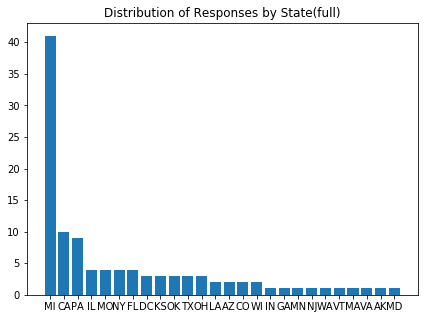

In [11]:
# Distribution by state 
data = full_results_US['state'].value_counts()
x = data.index
y = data.values
plt.figure(1, figsize=(7,5))
plt.bar(x, y)
plt.title("Distribution of Responses by State{}".format('(full)'))
fig1 = plt.gcf() # get current figure
fig1.savefig("./images/responses_by_state{}.png".format('(full)'))
# plt.show() should come after savefig()
plt.show()

In [12]:
# Save
full_results_US.to_csv('./temp_data/comparisons_US(full).csv')

## Prepare the data for BradleyTerry Model Input

In [121]:
# Separate data for paired comparisons analysis 
paired_questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
paired_comparisons = full_results_US[paired_questions]
columns = ['source1', 'source2', 'win1', 'win2']
rows = []

for i in paired_questions:
    row = paired_comparisons[i].value_counts().index.tolist() 
    row = row + paired_comparisons[i].value_counts().values.tolist()
    rows.append(row)

win_table = pd.DataFrame(rows, columns=columns)
print("Dimensions: {}".format(win_table.shape))
win_table

Dimensions: (6, 4)


,source1,source2,win1,win2
0,Public water fountain,Drinkable water generated from a car filtratio...,69,40
1,Tap water from home,Public water fountain,85,24
2,Bottled water,Public water fountain,75,34
3,Tap water from home,Drinkable water generated from a car filtratio...,84,25
4,Bottled water,Drinkable water generated from a car filtratio...,85,24
5,Bottled water,Tap water from home,57,52


In [122]:
# Save
win_table.to_csv('./output/win_table_US(full).csv')

# Format data for BTmodel

In [134]:
win_table = pd.read_csv('./output/win_table_US(full).csv', index_col=0)
win_table.head(10)

,source1,source2,win1,win2
0,Public water fountain,Drinkable water generated from a car filtratio...,69,40
1,Tap water from home,Public water fountain,85,24
2,Bottled water,Public water fountain,75,34
3,Tap water from home,Drinkable water generated from a car filtratio...,84,25
4,Bottled water,Drinkable water generated from a car filtratio...,85,24
5,Bottled water,Tap water from home,57,52


In [135]:
source1 = set(win_table['source1'].unique())
source2 = set(win_table['source2'].unique())
col1 = list(source1.difference(source2))
col2 = list(source2.difference(source1))
print(col1,'\n', col2)

['Bottled water'] 
 ['Drinkable water generated from a car filtration system']


In [136]:
# Make sure each option appears at least once in both columns
out1 = win_table['source1'].str.contains(col1[0]).idxmax()
out2 = win_table['source2'].str.contains(col2[0]).idxmax()
print("First index of '{}' in column 'source1': {}".format(col1[0], out1))
print("First index of '{}' in column 'source2': {}".format(col2[0], out2))

for i in [out1, out2]:
    source_left = win_table.iloc[i, 0]
    win_left = win_table.iloc[i, 2]
    win_table.iloc[i, 0] = win_table.iloc[i, 1]
    win_table.iloc[i, 2] = win_table.iloc[i, 3]
    win_table.iloc[i, 1] = source_left
    win_table.iloc[i, 3] = win_left

First index of 'Bottled water' in column 'source1': 2
First index of 'Drinkable water generated from a car filtration system' in column 'source2': 0


In [137]:
print("Unique sources in '{}' column: {}".format('source1', win_table['source1'].nunique()))
source_left = set(win_table['source1'])

print("Unique sources in '{}' column: {}".format('source2', win_table['source2'].nunique()))
source_right = set(win_table['source2'])

# Unique sources in both columns
all_sources = source_left.union(source_right)
print("Total number of unique sources in data: {}".format(len(all_sources)))

# Check if both 'source1' and 'source2' have the same number of unique sources
# Find (if any) the missing drug
print("The '{}' column is missing: {}".format('source2', source_left.difference(source_right)))
print("The '{}' column is missing: {}".format('source1', source_right.difference(source_left)))

Unique sources in 'source1' column: 4
Unique sources in 'source2' column: 4
Total number of unique sources in data: 4
The 'source2' column is missing: set()
The 'source1' column is missing: set()


In [138]:
# Save
win_table.to_csv('./output/win_table_US(full).csv', index=False)